#### Data Exploration and Preprocessing

In [1]:
import pandas as pd
# Load the dataset
df = pd.read_csv("Alphabets_data.csv")
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [2]:
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


##### Summarize key features

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [4]:
print("Number of samples:", df.shape[0])

Number of samples: 20000


In [5]:
print("Number of features:", df.shape[1] - 1)

Number of features: 16


In [6]:
print("Number of classes:", df['letter'].nunique())

Number of classes: 26


##### Check for missing values

In [7]:
print("\nMissing values per column:")
df.isnull().sum()


Missing values per column:


letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [8]:
#Separate features and target
X = df.drop('letter', axis=1)
y = df['letter']

In [9]:
# Data Normalization (using StandardScaler)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

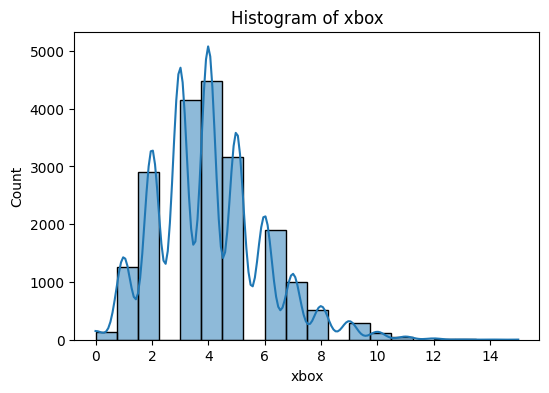

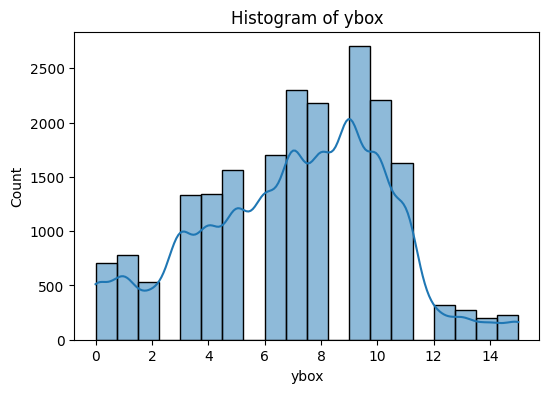

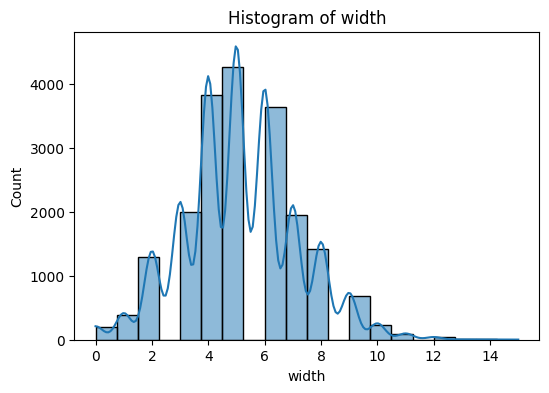

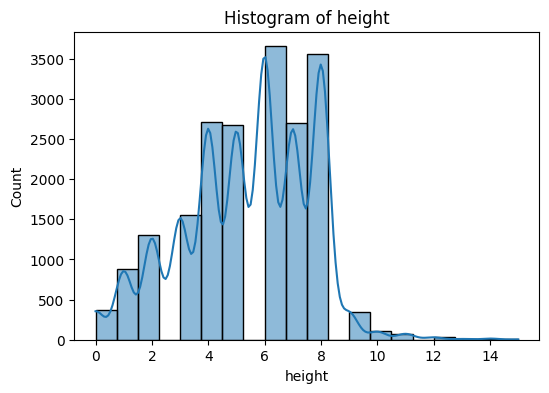

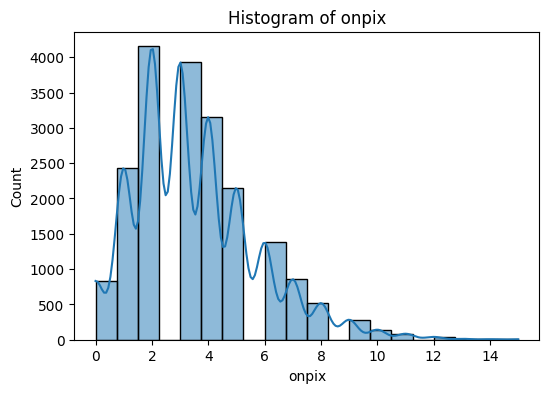

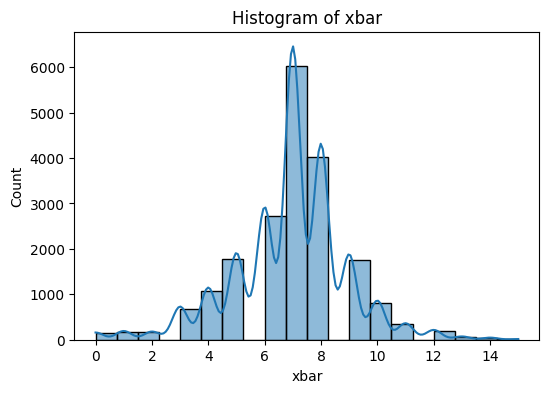

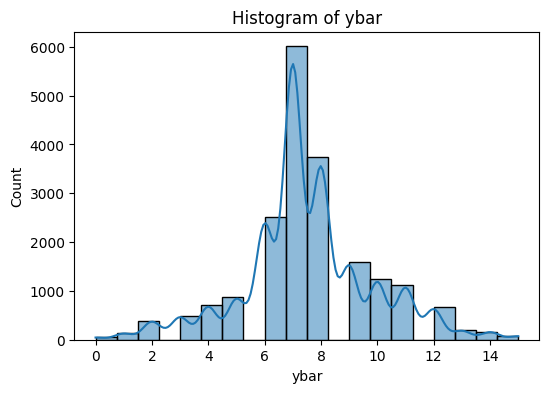

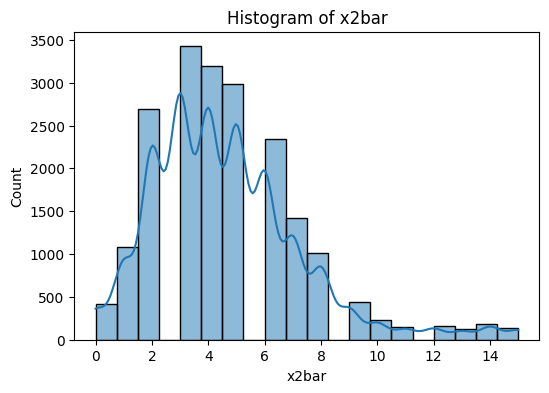

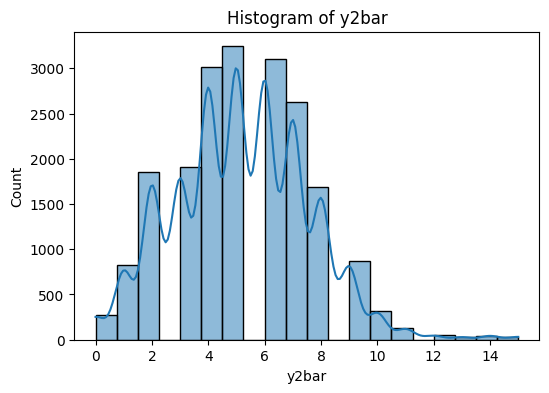

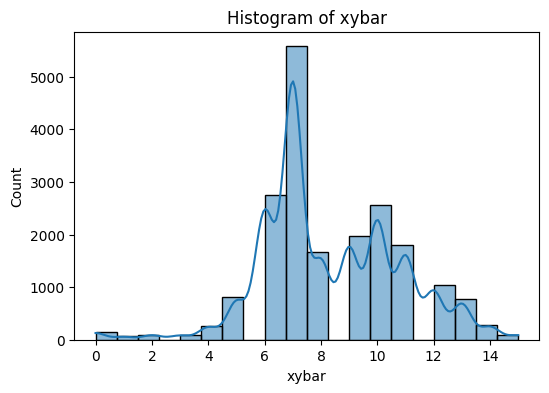

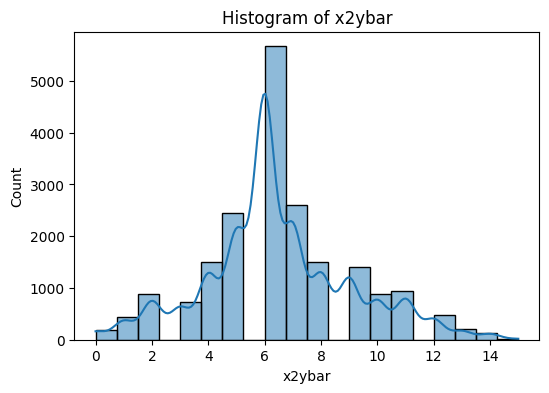

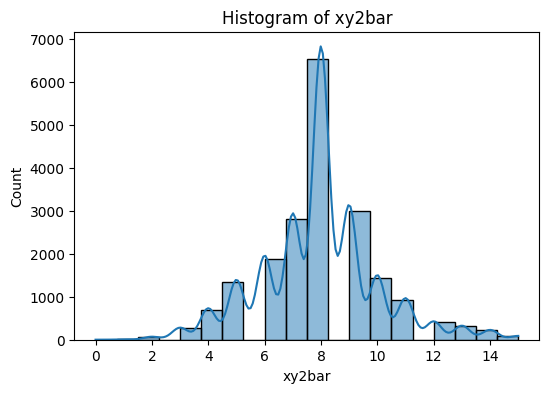

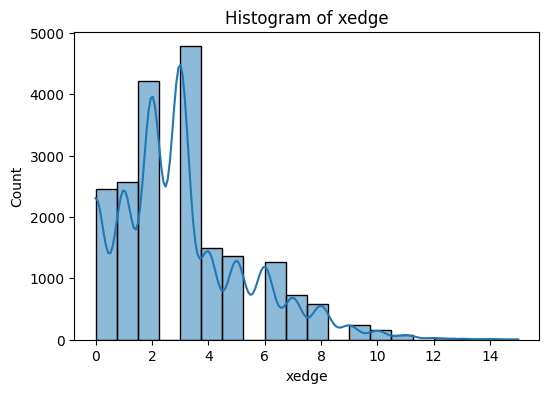

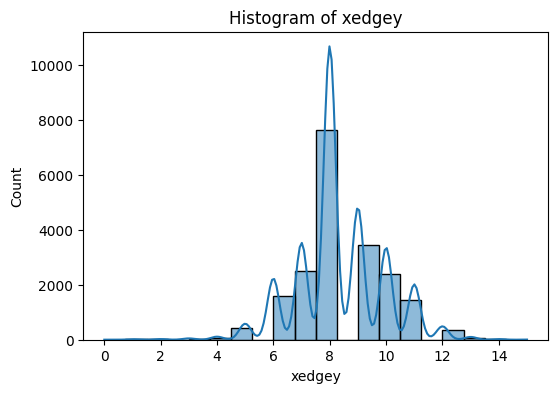

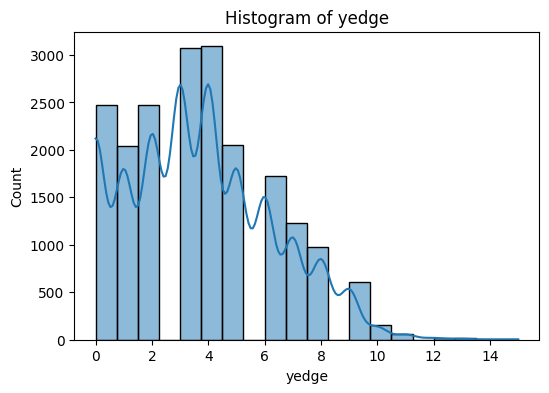

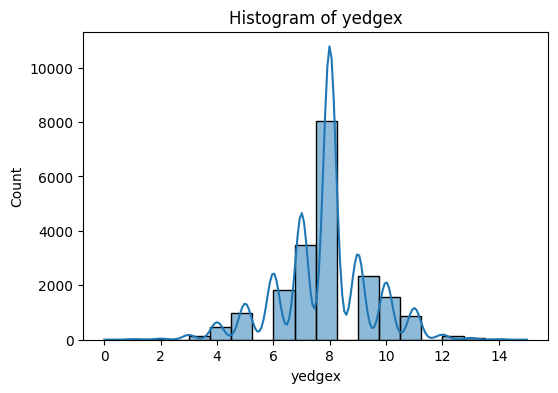

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

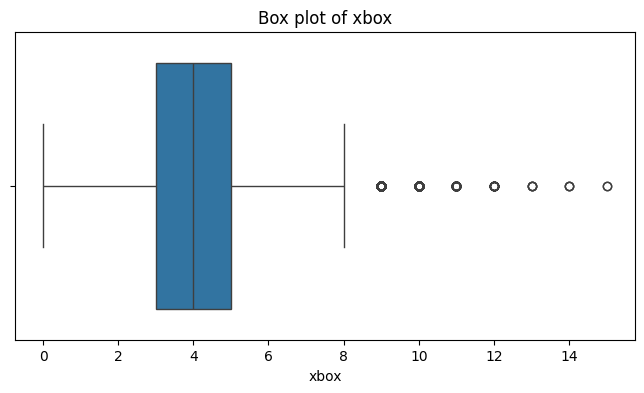

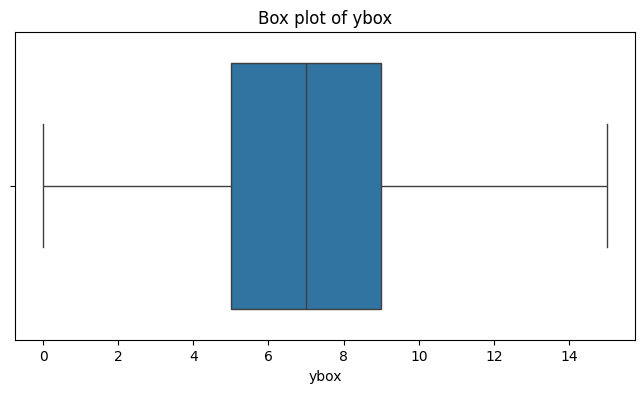

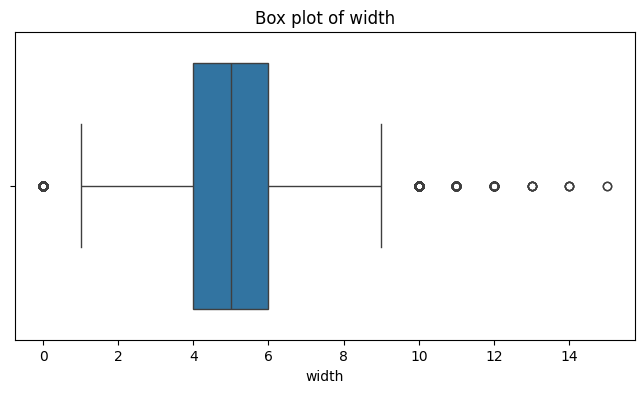

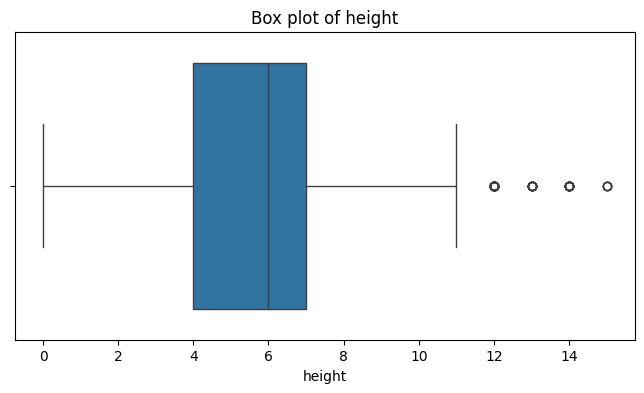

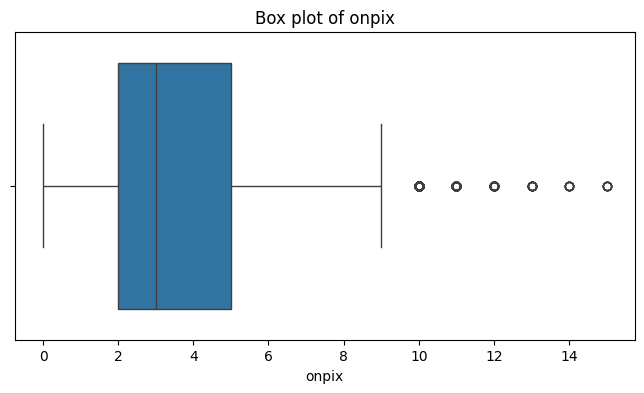

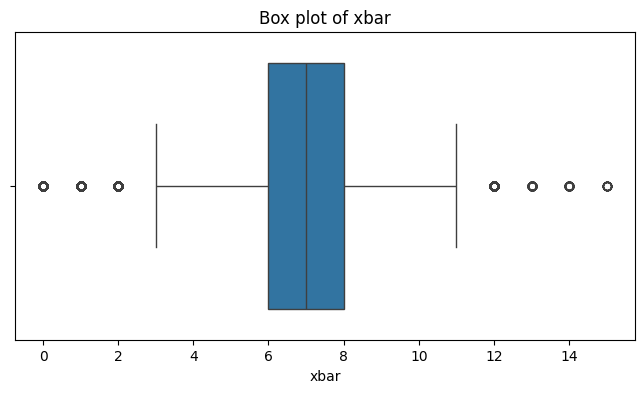

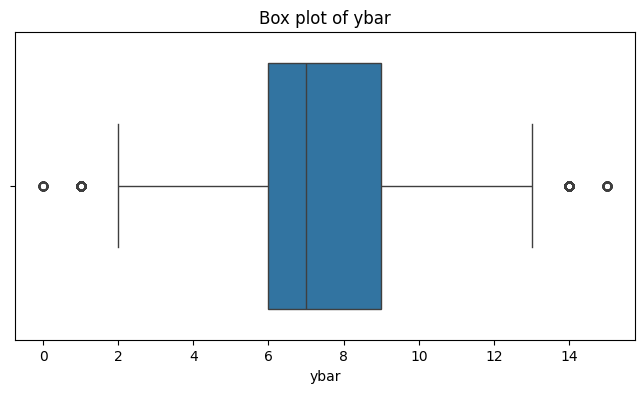

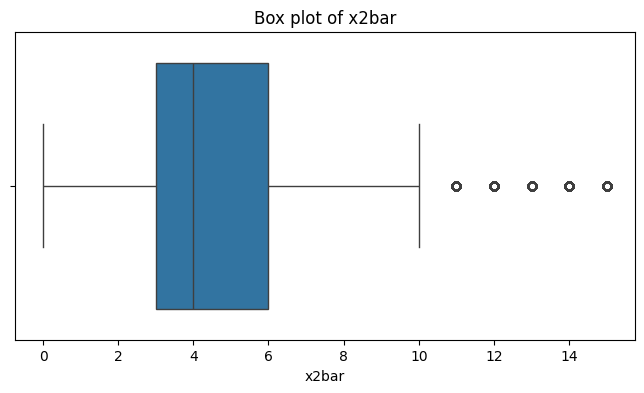

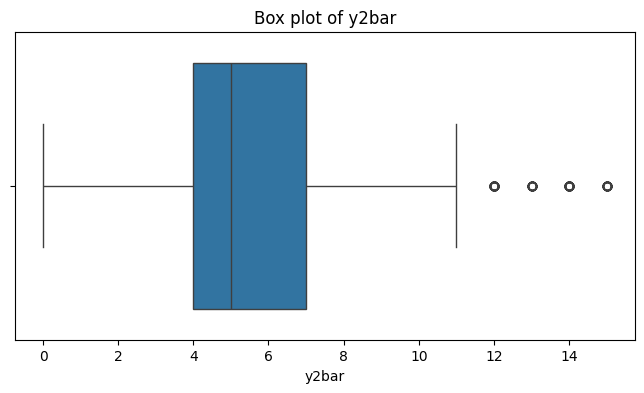

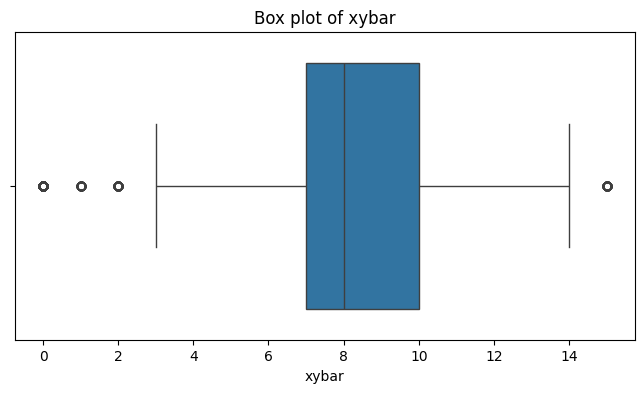

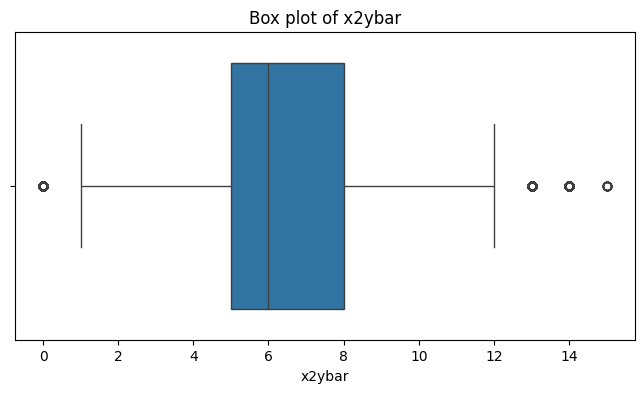

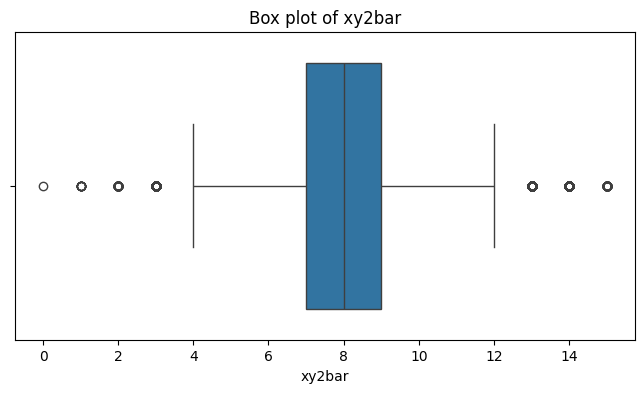

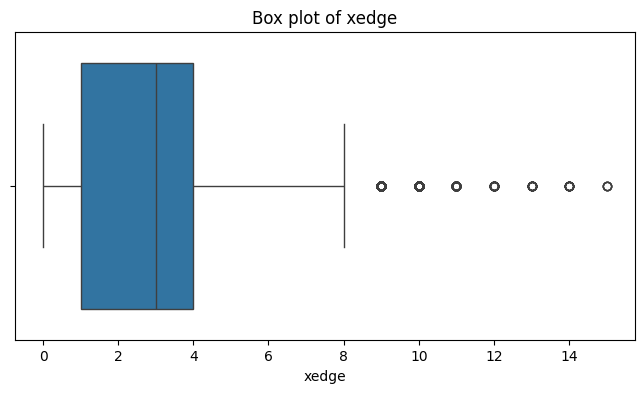

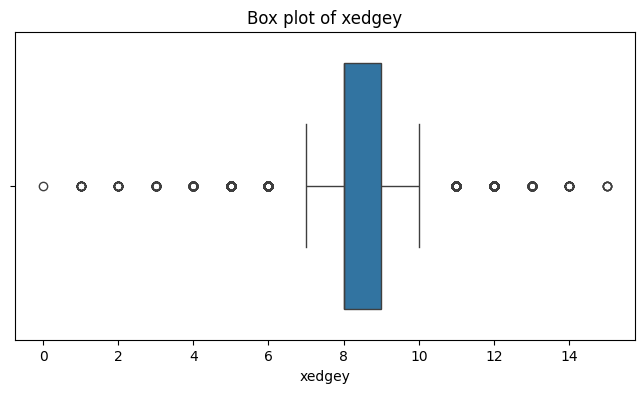

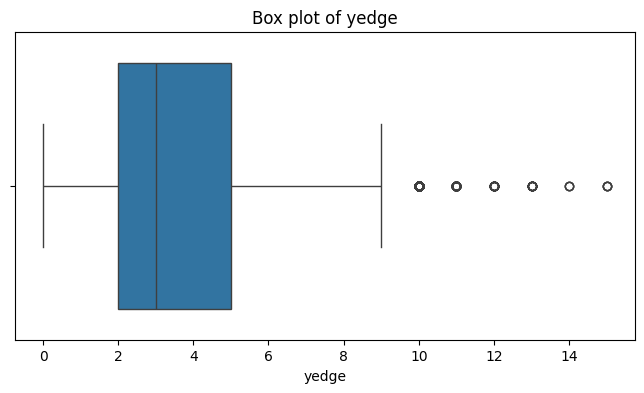

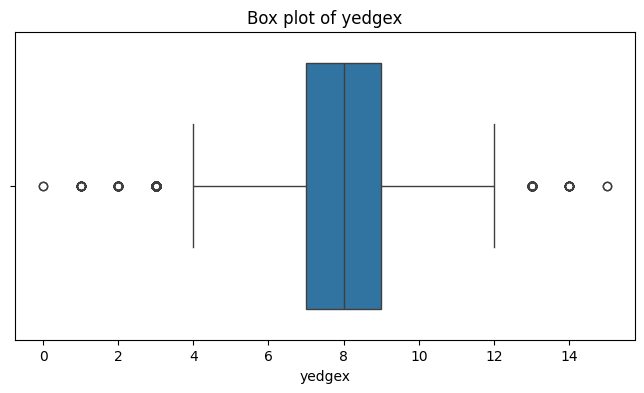

In [11]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

In [12]:
import warnings 
warnings.filterwarnings("ignore")

##### removing outliers

In [13]:
#xbox
import numpy as np
Q1 = np.percentile(df["xbox"],25)
Q3 = np.percentile(df["xbox"],75)
IQR = Q3 - Q1 
UW = Q3 + (1.5 * IQR)
LW = Q1 - (1.5 * IQR)

In [14]:
print("Number of outliers present in xbox Column : ",len(df["xbox"][df["xbox"]>UW]))
print("Number of outliers present in xbox Column : ",len(df["xbox"][df["xbox"]<LW]))

Number of outliers present in xbox Column :  482
Number of outliers present in xbox Column :  0


In [15]:
df["xbox"][df["xbox"]>UW] = UW

In [16]:
print("Number of outliers present in xbox Column : ",len(df["xbox"][df["xbox"]>UW]))
print("Number of outliers present in xbox Column : ",len(df["xbox"][df["xbox"]<LW]))

Number of outliers present in xbox Column :  0
Number of outliers present in xbox Column :  0


In [17]:
#width
Q1 = np.percentile(df["width"],25)
Q3 = np.percentile(df["width"],75)
IQR = Q3 - Q1 
UW = Q3 + (1.5 * IQR)
LW = Q1 - (1.5 * IQR)

In [18]:
print("Number of outliers present in width Column : ",len(df["width"][df["width"]>UW]))
print("Number of outliers present in width Column : ",len(df["width"][df["width"]<LW]))

Number of outliers present in width Column :  379
Number of outliers present in width Column :  195


In [19]:
df["width"][df["width"]>UW] = UW
df["width"][df["width"]<LW] = LW

In [20]:
print("Number of outliers present in width Column : ",len(df["width"][df["width"]>UW]))
print("Number of outliers present in width Column : ",len(df["width"][df["width"]<LW]))

Number of outliers present in width Column :  0
Number of outliers present in width Column :  0


In [21]:
#height
Q1 = np.percentile(df["height"],25)
Q3 = np.percentile(df["height"],75)
IQR = Q3 - Q1 
UW = Q3 + (1.5 * IQR)
LW = Q1 - (1.5 * IQR)

In [22]:
print("Number of outliers present in height Column : ",len(df["height"][df["height"]>UW]))
print("Number of outliers present in height Column : ",len(df["height"][df["height"]<LW]))

Number of outliers present in height Column :  60
Number of outliers present in height Column :  0


In [23]:
df["height"][df["height"]>UW] = UW

In [24]:
print("Number of outliers present in height Column : ",len(df["height"][df["height"]>UW]))
print("Number of outliers present in height Column : ",len(df["height"][df["height"]<LW]))

Number of outliers present in height Column :  0
Number of outliers present in height Column :  0


In [25]:
import numpy as np
Q1 = np.percentile(df["onpix"],25)
Q3 = np.percentile(df["onpix"],75)
IQR = Q3 - Q1 
UW = Q3 + (1.5 * IQR)
LW = Q1 - (1.5 * IQR)

In [26]:
print("Number of outliers present in onpix Column : ",len(df["onpix"][df["onpix"]>UW]))
print("Number of outliers present in onpix Column : ",len(df["onpix"][df["onpix"]<LW]))

Number of outliers present in onpix Column :  293
Number of outliers present in onpix Column :  0


In [27]:
df["onpix"][df["onpix"]>UW] = UW

In [28]:
print("Number of outliers present in onpix Column : ",len(df["onpix"][df["onpix"]>UW]))
print("Number of outliers present in onpix Column : ",len(df["onpix"][df["onpix"]<LW]))

Number of outliers present in onpix Column :  0
Number of outliers present in onpix Column :  0


In [29]:
import numpy as np
Q1 = np.percentile(df["xbar"],25)
Q3 = np.percentile(df["xbar"],75)
IQR = Q3 - Q1 
UW = Q3 + (1.5 * IQR)
LW = Q1 - (1.5 * IQR)

In [30]:
print("Number of outliers present in xbar Column : ",len(df["xbar"][df["xbar"]>UW]))
print("Number of outliers present in xbar Column : ",len(df["xbar"][df["xbar"]<LW]))

Number of outliers present in xbar Column :  325
Number of outliers present in xbar Column :  494


In [31]:
df["xbar"][df["xbar"]>UW] = UW
df["xbar"][df["xbar"]<LW] = LW

In [32]:
print("Number of outliers present in xbar Column : ",len(df["xbar"][df["xbar"]>UW]))
print("Number of outliers present in xbar Column : ",len(df["xbar"][df["xbar"]<LW]))

Number of outliers present in xbar Column :  0
Number of outliers present in xbar Column :  0


In [33]:
import numpy as np
Q1 = np.percentile(df["ybar"],25)
Q3 = np.percentile(df["ybar"],75)
IQR = Q3 - Q1 
UW = Q3 + (1.5 * IQR)
LW = Q1 - (1.5 * IQR)

In [34]:
print("Number of outliers present in ybar Column : ",len(df["ybar"][df["ybar"]>UW]))
print("Number of outliers present in ybar Column : ",len(df["ybar"][df["ybar"]<LW]))

Number of outliers present in ybar Column :  241
Number of outliers present in ybar Column :  181


In [35]:
df["ybar"][df["ybar"]>UW] = UW
df["ybar"][df["ybar"]<LW] = LW

In [36]:
print("Number of outliers present in ybar Column : ",len(df["ybar"][df["ybar"]>UW]))
print("Number of outliers present in ybar Column : ",len(df["ybar"][df["ybar"]<LW]))

Number of outliers present in ybar Column :  0
Number of outliers present in ybar Column :  0


In [37]:
import numpy as np
Q1 = np.percentile(df["x2bar"],25)
Q3 = np.percentile(df["x2bar"],75)
IQR = Q3 - Q1 
UW = Q3 + (1.5 * IQR)
LW = Q1 - (1.5 * IQR)

In [38]:
print("Number of outliers present in x2bar Column : ",len(df["x2bar"][df["x2bar"]>UW]))
print("Number of outliers present in x2bar Column : ",len(df["x2bar"][df["x2bar"]<LW]))

Number of outliers present in x2bar Column :  750
Number of outliers present in x2bar Column :  0


In [39]:
df["x2bar"][df["x2bar"]>UW] = UW
df["x2bar"][df["x2bar"]<LW] = LW

In [40]:
print("Number of outliers present in x2bar Column : ",len(df["x2bar"][df["x2bar"]>UW]))
print("Number of outliers present in x2bar Column : ",len(df["x2bar"][df["x2bar"]<LW]))

Number of outliers present in x2bar Column :  0
Number of outliers present in x2bar Column :  0


In [41]:
import numpy as np
Q1 = np.percentile(df["y2bar"],25)
Q3 = np.percentile(df["y2bar"],75)
IQR = Q3 - Q1 
UW = Q3 + (1.5 * IQR)
LW = Q1 - (1.5 * IQR)

In [42]:
print("Number of outliers present in y2bar Column : ",len(df["y2bar"][df["y2bar"]>UW]))
print("Number of outliers present in y2bar Column : ",len(df["y2bar"][df["y2bar"]<LW]))

Number of outliers present in y2bar Column :  159
Number of outliers present in y2bar Column :  0


In [43]:
df["y2bar"][df["y2bar"]>UW] = UW
df["y2bar"][df["y2bar"]<LW] = LW

In [44]:
print("Number of outliers present in y2bar Column : ",len(df["y2bar"][df["y2bar"]>UW]))
print("Number of outliers present in y2bar Column : ",len(df["y2bar"][df["y2bar"]<LW]))

Number of outliers present in y2bar Column :  0
Number of outliers present in y2bar Column :  0


In [45]:
import numpy as np
Q1 = np.percentile(df["xybar"],25)
Q3 = np.percentile(df["xybar"],75)
IQR = Q3 - Q1 
UW = Q3 + (1.5 * IQR)
LW = Q1 - (1.5 * IQR)

In [46]:
print("Number of outliers present in xybar Column : ",len(df["xybar"][df["xybar"]>UW]))
print("Number of outliers present in xybar Column : ",len(df["xybar"][df["xybar"]<LW]))

Number of outliers present in xybar Column :  96
Number of outliers present in xybar Column :  304


In [47]:
df["xybar"][df["xybar"]>UW] = UW
df["xybar"][df["xybar"]<LW] = LW

In [48]:
print("Number of outliers present in xybar Column : ",len(df["xybar"][df["xybar"]>UW]))
print("Number of outliers present in xybar Column : ",len(df["xybar"][df["xybar"]<LW]))

Number of outliers present in xybar Column :  0
Number of outliers present in xybar Column :  0


In [49]:
import numpy as np
Q1 = np.percentile(df["x2ybar"],25)
Q3 = np.percentile(df["x2ybar"],75)
IQR = Q3 - Q1 
UW = Q3 + (1.5 * IQR)
LW = Q1 - (1.5 * IQR)

In [50]:
print("Number of outliers present in x2ybar Column : ",len(df["x2ybar"][df["x2ybar"]>UW]))
print("Number of outliers present in x2ybar Column : ",len(df["x2ybar"][df["x2ybar"]<LW]))

Number of outliers present in x2ybar Column :  355
Number of outliers present in x2ybar Column :  188


In [51]:
df["x2ybar"][df["x2ybar"]>UW] = UW
df["x2ybar"][df["x2ybar"]<LW] = LW

In [52]:
print("Number of outliers present in x2ybar Column : ",len(df["x2ybar"][df["x2ybar"]>UW]))
print("Number of outliers present in x2ybar Column : ",len(df["x2ybar"][df["x2ybar"]<LW]))

Number of outliers present in x2ybar Column :  0
Number of outliers present in x2ybar Column :  0


In [53]:
import numpy as np
Q1 = np.percentile(df["xy2bar"],25)
Q3 = np.percentile(df["xy2bar"],75)
IQR = Q3 - Q1 
UW = Q3 + (1.5 * IQR)
LW = Q1 - (1.5 * IQR)

In [54]:
print("Number of outliers present in xy2bar Column : ",len(df["xy2bar"][df["xy2bar"]>UW]))
print("Number of outliers present in xy2bar Column : ",len(df["xy2bar"][df["xy2bar"]<LW]))

Number of outliers present in xy2bar Column :  617
Number of outliers present in xy2bar Column :  346


In [55]:
df["xy2bar"][df["xy2bar"]>UW] = UW
df["xy2bar"][df["xy2bar"]<LW] = LW

In [56]:
print("Number of outliers present in xy2bar Column : ",len(df["xy2bar"][df["xy2bar"]>UW]))
print("Number of outliers present in xy2bar Column : ",len(df["xy2bar"][df["xy2bar"]<LW]))

Number of outliers present in xy2bar Column :  0
Number of outliers present in xy2bar Column :  0


In [57]:
import numpy as np
Q1 = np.percentile(df["xedge"],25)
Q3 = np.percentile(df["xedge"],75)
IQR = Q3 - Q1 
UW = Q3 + (1.5 * IQR)
LW = Q1 - (1.5 * IQR)

In [58]:
print("Number of outliers present in xedge Column : ",len(df["xedge"][df["xedge"]>UW]))
print("Number of outliers present in xedge Column : ",len(df["xedge"][df["xedge"]<LW]))

Number of outliers present in xedge Column :  543
Number of outliers present in xedge Column :  0


In [59]:
df["xedge"][df["xedge"]>UW] = UW
df["xedge"][df["xedge"]<LW] = LW

In [60]:
print("Number of outliers present in xedge Column : ",len(df["xedge"][df["xedge"]>UW]))
print("Number of outliers present in xedge Column : ",len(df["xedge"][df["xedge"]<LW]))

Number of outliers present in xedge Column :  0
Number of outliers present in xedge Column :  0


In [61]:
import numpy as np
Q1 = np.percentile(df["xedgey"],25)
Q3 = np.percentile(df["xedgey"],75)
IQR = Q3 - Q1 
UW = Q3 + (1.5 * IQR)
LW = Q1 - (1.5 * IQR)

In [62]:
print("Number of outliers present in xedgey Column : ",len(df["xedgey"][df["xedgey"]>UW]))
print("Number of outliers present in xedgey Column : ",len(df["xedgey"][df["xedgey"]<LW]))

Number of outliers present in xedgey Column :  1877
Number of outliers present in xedgey Column :  2152


In [63]:
df["xedgey"][df["xedgey"]>UW] = UW
df["xedgey"][df["xedgey"]<LW] = LW

In [64]:
print("Number of outliers present in xedgey Column : ",len(df["xedgey"][df["xedgey"]>UW]))
print("Number of outliers present in xedgey Column : ",len(df["xedgey"][df["xedgey"]<LW]))

Number of outliers present in xedgey Column :  0
Number of outliers present in xedgey Column :  0


In [65]:
import numpy as np
Q1 = np.percentile(df["yedge"],25)
Q3 = np.percentile(df["yedge"],75)
IQR = Q3 - Q1 
UW = Q3 + (1.5 * IQR)
LW = Q1 - (1.5 * IQR)

In [66]:
print("Number of outliers present in yedge Column : ",len(df["yedge"][df["yedge"]>UW]))
print("Number of outliers present in yedge Column : ",len(df["yedge"][df["yedge"]<LW]))

Number of outliers present in yedge Column :  260
Number of outliers present in yedge Column :  0


In [67]:
df["yedge"][df["yedge"]>UW] = UW
df["yedge"][df["yedge"]<LW] = LW

In [68]:
print("Number of outliers present in yedge Column : ",len(df["yedge"][df["yedge"]>UW]))
print("Number of outliers present in yedge Column : ",len(df["yedge"][df["yedge"]<LW]))

Number of outliers present in yedge Column :  0
Number of outliers present in yedge Column :  0


In [69]:
import numpy as np
Q1 = np.percentile(df["yedgex"],25)
Q3 = np.percentile(df["yedgex"],75)
IQR = Q3 - Q1 
UW = Q3 + (1.5 * IQR)
LW = Q1 - (1.5 * IQR)

In [70]:
print("Number of outliers present in yedgex Column : ",len(df["yedgex"][df["yedgex"]>UW]))
print("Number of outliers present in yedgex Column : ",len(df["yedgex"][df["yedgex"]<LW]))

Number of outliers present in yedgex Column :  64
Number of outliers present in yedgex Column :  179


In [71]:
df["yedgex"][df["yedgex"]>UW] = UW
df["yedgex"][df["yedgex"]<LW] = LW

In [72]:
print("Number of outliers present in yedgex Column : ",len(df["yedgex"][df["yedgex"]>UW]))
print("Number of outliers present in yedgex Column : ",len(df["yedgex"][df["yedgex"]<LW]))

Number of outliers present in yedgex Column :  0
Number of outliers present in yedgex Column :  0


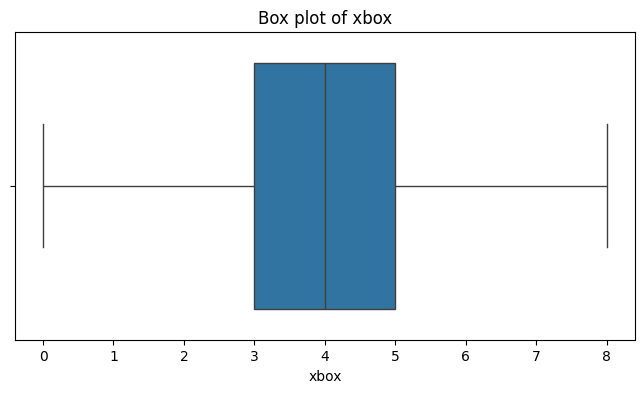

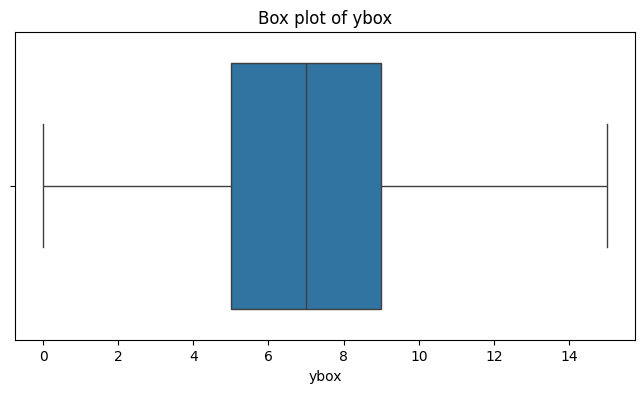

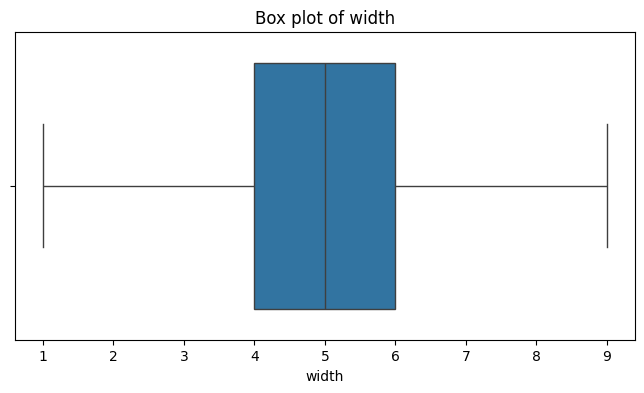

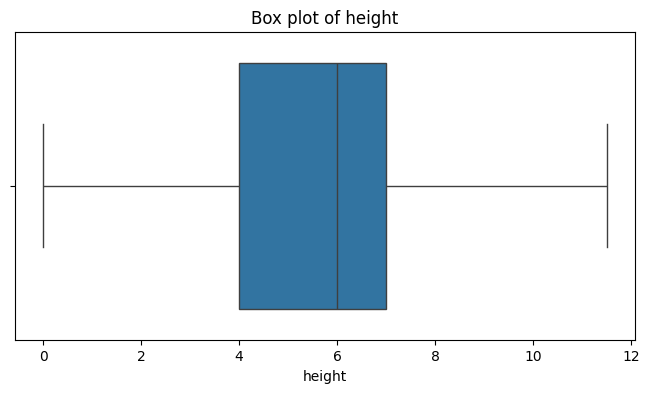

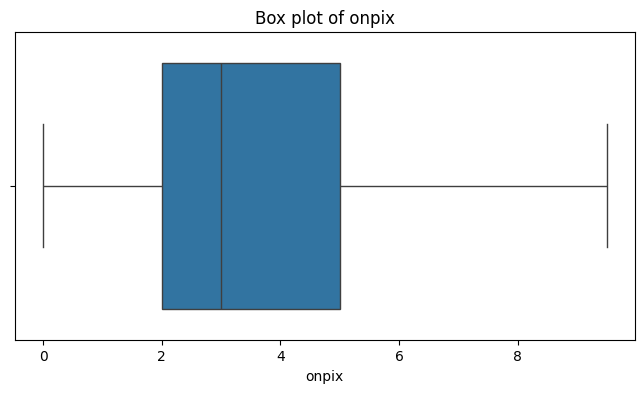

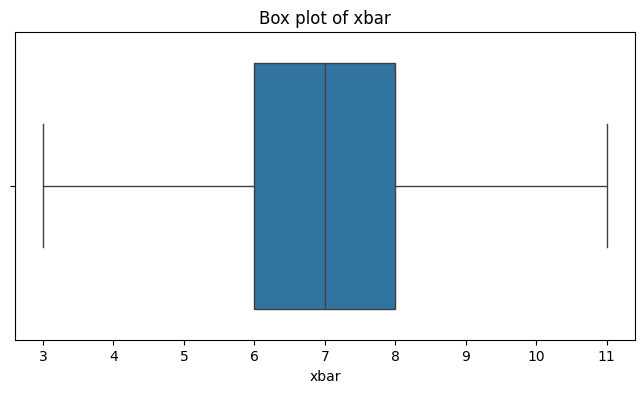

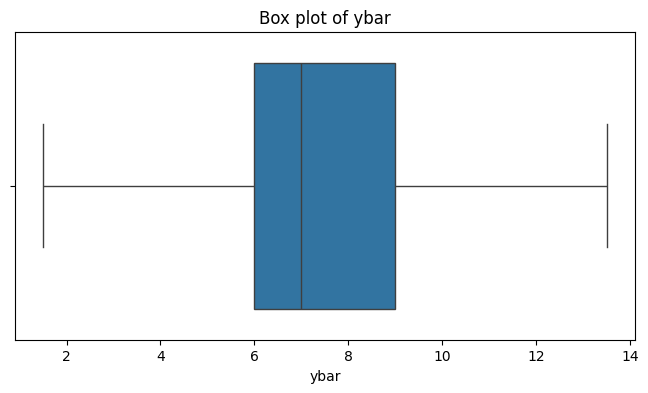

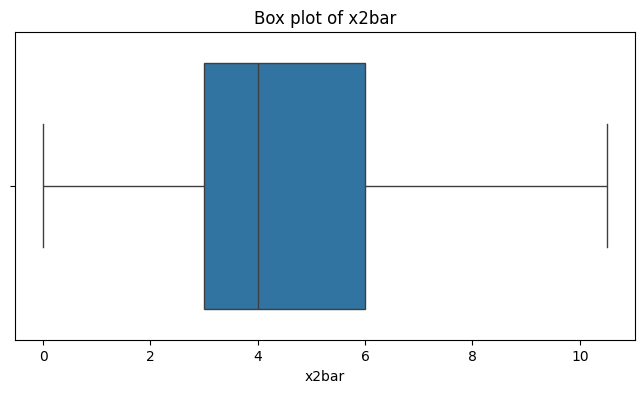

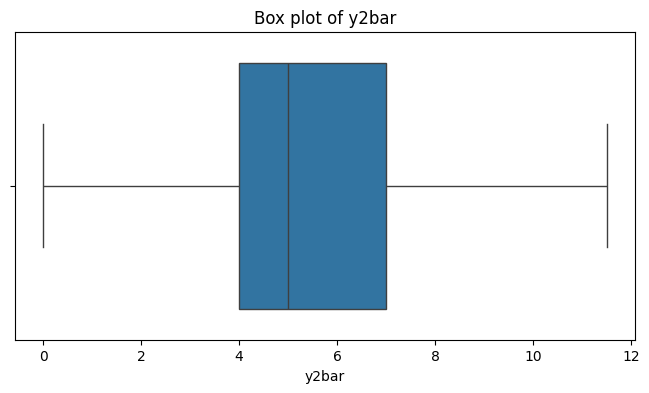

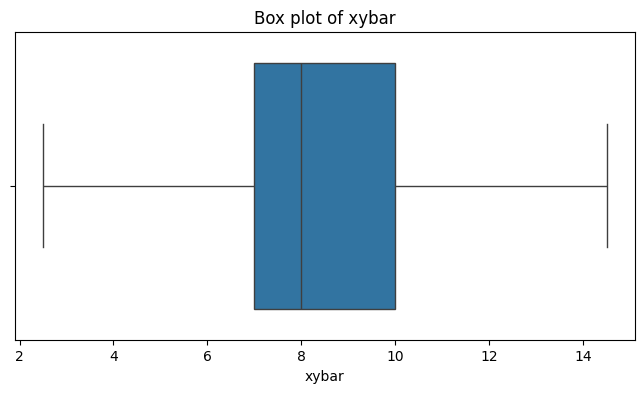

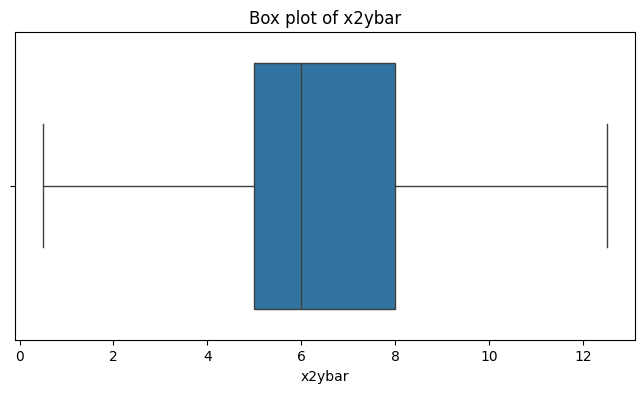

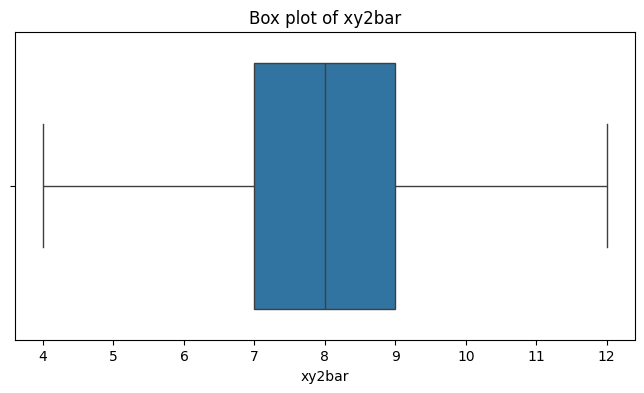

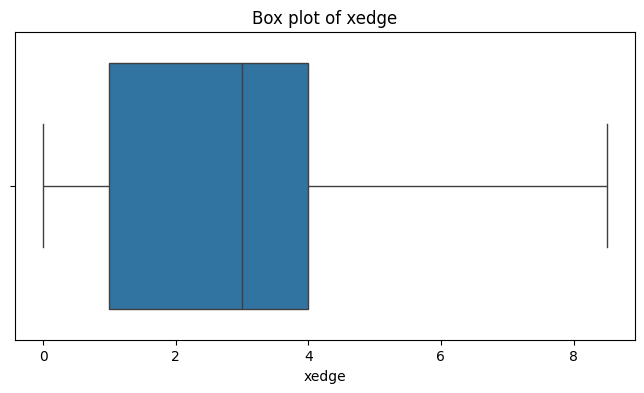

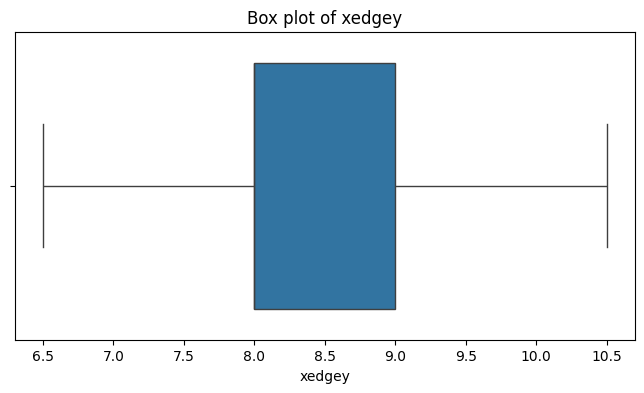

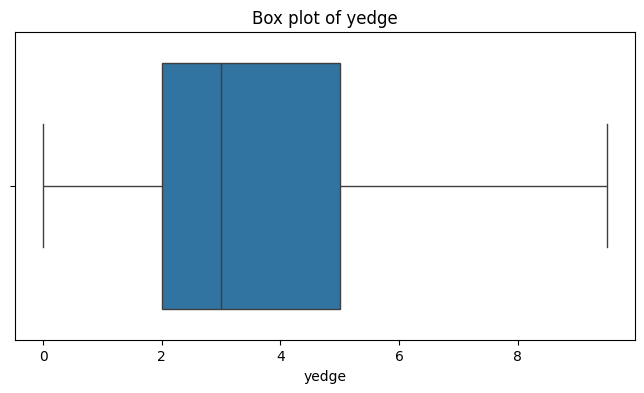

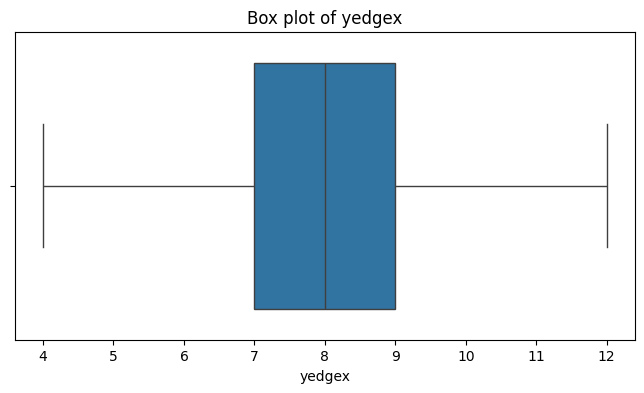

In [73]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

#### Model Implementation

In [74]:
#pip install tensorflow

In [75]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [76]:
print("Data split into training and testing sets.")
print("Training data shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing data shape (X_test, y_test):", X_test.shape, y_test.shape)

Data split into training and testing sets.
Training data shape (X_train, y_train): (16000, 16) (16000,)
Testing data shape (X_test, y_test): (4000, 16) (4000,)


In [77]:
# Convert target labels to numerical format (one-hot encoding)
# This is necessary for using categorical crossentropy loss in the ANN
y_train_encoded = pd.get_dummies(y_train)
y_test_encoded = pd.get_dummies(y_test)

print("Target labels encoded for ANN.")

Target labels encoded for ANN.


#### Build the ANN model

In [78]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)), # Input layer and first hidden layer
    Dense(64, activation='relu'), # Second hidden layer
    Dense(y_train_encoded.shape[1], activation='softmax') # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [79]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 26)                  │           1,690 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,122 (47.35 KB)

 Trainable params: 12,122 (47.35 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
# Train the model
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5780 - loss: 1.5622 - val_accuracy: 0.7453 - val_loss: 0.9073
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7842 - loss: 0.7454 - val_accuracy: 0.8191 - val_loss: 0.6604
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8355 - loss: 0.5704 - val_accuracy: 0.8425 - val_loss: 0.5351
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8655 - loss: 0.4654 - val_accuracy: 0.8684 - val_loss: 0.4594
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8864 - loss: 0.3929 - val_accuracy: 0.8888 - val_loss: 0.3838
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9031 - loss: 0.3383 - val_accuracy: 0.8944 - val_loss: 0.3551
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9122 - loss: 0.2960 - val_accuracy: 0.9062 - val_loss: 0.3202
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9220 - loss: 0.2648 - val_accuracy: 0.

In [81]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test_encoded)

print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9285 - loss: 0.2404

Test Loss: 0.2404
Test Accuracy: 0.9285


In [82]:
# Make predictions on the test set
predictions = model.predict(X_test)

print("\nPredictions made on the test set.")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Predictions made on the test set.


#### Hyperparameter Tuning

In [83]:
#Define the hyperparameter search space
param_distributions = {
    'num_layers': [1, 2],
    'neurons_per_layer': [[64], [128, 64]],
    'activation': ['relu', 'tanh'],
    'learning_rate': [0.001, 0.01],
    'batch_size': [32, 64],
    'epochs': [10, 20]
}

print("Hyperparameter search space defined:")
print(param_distributions)

Hyperparameter search space defined:
{'num_layers': [1, 2], 'neurons_per_layer': [[64], [128, 64]], 'activation': ['relu', 'tanh'], 'learning_rate': [0.001, 0.01], 'batch_size': [32, 64], 'epochs': [10, 20]}


In [84]:
#pip install scikeras

Builds and compiles an ANN model based on hyperparameters.
Args:num_layers (int): The number of hidden layers.
neurons_per_layer (list): A list of integers, where each integer represents the number of 
                    neurons in a hidden layer. The length of the listshould equal num_layers.
activation (str): The activation function to use for hidden layers.
learning_rate (float): The learning rate for the Adam optimizer.
Returns:tensorflow.keras.models.Sequential: The compiled Keras model.

In [85]:
##Build a model creation function
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def build_model(num_layers, neurons_per_layer, activation, learning_rate):
    model = Sequential()
   
    # Input layer and first hidden layer
    model.add(Dense(neurons_per_layer[0], activation=activation, input_shape=(X_train.shape[1],)))
   
    # Additional hidden layers
    for i in range(1, num_layers):
        model.add(Dense(neurons_per_layer[i], activation=activation))
   
    # Output layer
    model.add(Dense(y_train_encoded.shape[1], activation='softmax'))
   
    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model
print("Model building function defined.")

Model building function defined.


In [86]:
#pip install -U scikit-learn scikeras

In [87]:
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier
import numpy as np

# Create a KerasClassifier wrapper for the model
# The build_fn is the function that creates the Keras model
keras_model = KerasClassifier(model=build_model, verbose=0)

# Define the parameter distribution for RandomizedSearchCV
random_param_dist = {
    'model__num_layers':  param_distributions['num_layers'],
    'model__neurons_per_layer':  param_distributions['neurons_per_layer'],
    'model__activation':  param_distributions['activation'],
    'model__learning_rate':  param_distributions['learning_rate'],
    'batch_size':  param_distributions['batch_size'],
    'epochs':  param_distributions['epochs']
}


# Create the RandomizedSearchCV object
# n_iter: Number of parameter settings that are sampled. Adjust this to control the number of trials.
# cv=3 means 3-fold cross-validation
random_search = RandomizedSearchCV(estimator=keras_model,
                                   param_distributions=random_param_dist,
                                   scoring='accuracy',
                                   n_iter=10,
                                   cv=3,
                                   random_state=42, # for reproducibility
                                   n_jobs=-1) # Use all available cores

# Perform the random search
print("Performing Randomized Search...")
random_result = random_search.fit(X_train, y_train_encoded)

print("\nRandomized Search complete.")

Performing Randomized Search...

Randomized Search complete.


### Evaluation

In [89]:
from sklearn.metrics import classification_report, log_loss

# Evaluate the best model found by random Search on the test set
best_model = random_result.best_estimator_

# Use the score method for accuracy
accuracy_tuned = best_model.score(X_test, y_test_encoded)

In [90]:
# Make predictions with the tuned model to calculate loss and classification report
y_pred_tuned = best_model.predict(X_test)
y_pred_proba_tuned = best_model.predict_proba(X_test)

In [91]:
# Calculate log loss
loss_tuned = log_loss(y_test_encoded, y_pred_proba_tuned)

In [93]:
print(f"\nTuned Model Test Loss: {loss_tuned:.4f}")
print(f"Tuned Model Test Accuracy: {accuracy_tuned:.4f}")


Tuned Model Test Loss: 0.2120
Tuned Model Test Accuracy: 0.9327


In [94]:
# Convert one-hot encoded predictions and true labels back to class labels for classification report
y_test_labels = y_test.values
y_pred_labels_tuned = pd.DataFrame(y_pred_tuned, columns=y_train_encoded.columns).idxmax(axis=1)

In [95]:
# Generate classification report
print("\nClassification Report for Tuned Model:")
print(classification_report(y_test_labels, y_pred_labels_tuned))


Classification Report for Tuned Model:
              precision    recall  f1-score   support

           A       0.99      0.97      0.98       149
           B       0.89      0.87      0.88       153
           C       0.91      0.93      0.92       137
           D       0.93      0.89      0.91       156
           E       0.92      0.86      0.89       141
           F       0.93      0.91      0.92       140
           G       0.93      0.94      0.94       160
           H       0.89      0.82      0.85       144
           I       0.93      0.95      0.94       146
           J       0.95      0.91      0.93       149
           K       0.89      0.89      0.89       130
           L       0.93      0.96      0.95       155
           M       0.99      0.96      0.98       168
           N       0.96      0.91      0.94       151
           O       0.90      0.97      0.94       145
           P       0.94      0.94      0.94       173
           Q       0.96      0.95      0.

#### Performance Comparison: Default vs. Tuned Model

In [ ]:
Based on the evaluation on the test set, we can compare the performance of the initial model with default hyperparameters and the tuned 
model from the random Search:

Default Model Performance:
Test Loss: {{loss}}
Test Accuracy: {{accuracy}}

Tuned Model Performance:
Test Loss: {{loss_tuned}}
Test Accuracy: {{accuracy_tuned}}

Classification Report for Tuned Model:
{{classification_report(y_test_labels, y_pred_labels_tuned)}}

Discussion:
1.The hyperparameter tuning process using random Search has resulted in a significant improvement in the model's performance on the test set.
2.Accuracy: The tuned model achieved a test accuracy of {{accuracy_tuned:.4f}}, which is higher than the default model's accuracy of {{accuracy:.4f}}. 
            This indicates that the tuned model is better at correctly classifying the alphabet letters.
3.Loss: The tuned model also shows a lower test loss ({{loss_tuned:.4f}}) compared to the default model ({{loss:.4f}}).
        A lower loss value indicates that the tuned model's predictions are closer to the true labels.
4.Precision, Recall, and F1-score: The classification report for the tuned model provides detailed metrics for each class.
                                   We can observe the precision, recall, and F1-score for individual letters, which 
                                   gives a more granular view of the model's performance. The high values across most classes in the tuned model's 
                                   report suggest that tuning has improved the model's ability to correctly identify instances of each letter while
                                   minimizing false positives and false negatives.
Overall, the hyperparameter tuning process has been effective in finding a better set of hyperparameters that lead to a more accurate and robust model
for classifying the alphabet data. The improvements in accuracy and loss, as well as the detailed metrics in the classification report, demonstrate the positive impact of tuning.